# Tutorial de `pytrends` (Google Trends API para python)

En este cuaderno realizaremos el tutorial de `pytrends`. El material aqui presentado es adaptado de este [tutorial](https://github.com/Tanu-N-Prabhu/Python/blob/master/Google_Trends_API.ipynb).

La documentación de la biblioteca `pytrends` puede encontrarse [aqui](https://pypi.org/project/pytrends/).

## Implementation

## Conecting to Google

Conectamos con google usando el método `TrendReq()` de la biblioteca `pytrends.request`. Adicionalmente, importamos pandas para visualizar y almacenar datos.

In [21]:
import pandas as pd    
import matplotlib.pyplot as plt
from pytrends.request import TrendReq

pytrend = TrendReq()

## Interest by Region

Exploremos qué tan popular es la búsqueda 'Coronavirus' a nivel mundial.

In [22]:
pytrend.build_payload(kw_list=['Coronavirus'])
# Interest by Region
df = pytrend.interest_by_region(resolution = 'COUNTRY') # no funciona con resolution = 'CITY', 'DMA', 'REGION'
df.tail(10)

,Coronavirus
geoName,
Vanuatu,0
Vatican City,0
Venezuela,24
Vietnam,0
Wallis & Futuna,0
Western Sahara,0
Yemen,0
Zambia,0
Zimbabwe,0


**¿Qué es lo que significan estos valores?**

Los valores se presentan a un escala del 0 al 100. Aquí el número 100 le correspondería a la región cuya fracción de búsquedas de 'coronavirus' es la mayor de todas, así el número 50 correspondería a una región en donde esta búsqueda es la mitad de popular.

Visualicemos estos resultados de manera gráfica.

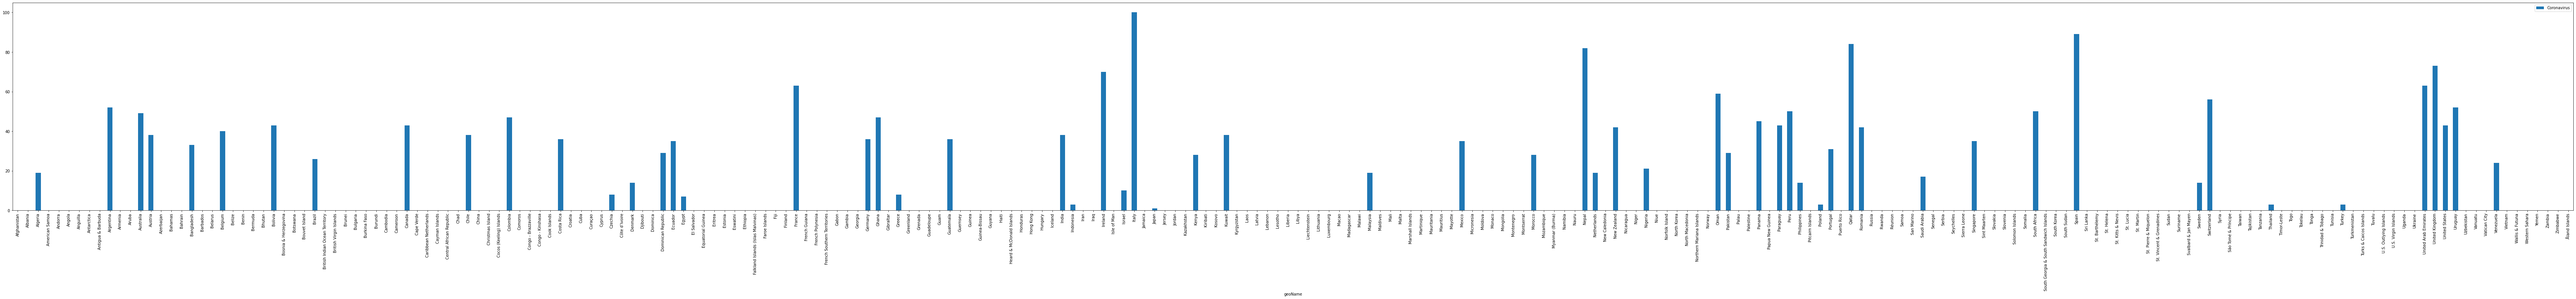

In [23]:
df.reset_index().plot(x = 'geoName', y = 'Coronavirus', figsize = (120, 10), kind = 'bar')
plt.show()

## Daily Search Trends

Exploremos el *top* de las búsquedas diarias a nivel global.

In [24]:
df = pytrend.trending_searches() 
df.head()

,0
0,Earth Day
1,Earth Day 2021
2,Lizzo
3,Andrew Brown
4,Suns


Ahora, exploremos este mismo *top* pero para un país.

In [25]:
df = pytrend.trending_searches(pn='colombia') # no funciona con pn = 'venezuela'
df.head()

,0
0,Atalanta
1,Cádiz Real Madrid
2,Dia de la Tierra
3,Juventus
4,Devolución del IVA


## Top Charts

Exploremos que fue tendencia en el año 2020.

In [26]:
df = pytrend.top_charts(2020, hl='en-US', tz=120, geo='GLOBAL') #tz desplazamiento de zona horaria 
df.head()

,title,exploreQuery
0,Coronavirus,
1,Election results,
2,Kobe Bryant,
3,Zoom,
4,IPL,


Veámos que ocurrió en un país.

In [27]:
df = pytrend.top_charts(2020, hl='en-US', tz=120, geo='CO') # no funciona con geo = 'VE'
df.head()

,title,exploreQuery
0,Coronavirus,
1,Elecciones Estados Unidos,
2,Zoom,
3,Google Classroom,
4,Ingreso solidario,


## Google Keywords Suggestion

In [28]:
keywords = pytrend.suggestions(keyword='Coronavirus')
df = pd.DataFrame(keywords)
df.drop(columns= 'mid')   # esta columna no tiene sentido

,title,type
0,Coronavirus,Virus
1,Coronavirus disease 2019,Disease
2,COVID-19 vaccine,Pharmaceutical
3,Severe acute respiratory syndrome coronavirus 2,Virus
4,2019–20 coronavirus pandemic,Topic


## Related Queries

Es común que cuando un usuario busca sobre un tema, este también se busque algo relacionado. Exploremos las búsquedas relacionadas a la palabra 'coronavirus' en Venezuela.

In [45]:
kw_list = ['covid 19', 'coronavirus']
pytrend.build_payload(kw_list, cat=0, timeframe='today 12-m', geo='VE', gprop='') 
# problemas al intentar una entrada distinta a timeframe = 'today 5-y' (e.g. timeframe = 'today 2-y' )

pytrend.related_queries()

{'covid 19': {'top':                              query  value
  0                      el covid 19    100
  1               venezuela covid 19     65
  2            covid 19 en venezuela     45
  3                  que el covid 19     32
  4                covid 19 sintomas     23
  5                  que es covid 19     22
  6             coronavirus covid 19     22
  7               que es el covid 19     16
  8            sintomas del covid 19     15
  9         casos covid 19 venezuela     15
  10              sintomas del covid     14
  11     casos de covid 19 venezuela     12
  12     casos covid 19 en venezuela     12
  13  casos de covid 19 en venezuela     11
  14     casos de covid en venezuela     10
  15            sintomas de covid 19      9
  16                 covid 19 vacuna      9
  17                          vacuna      9
  18          covid 19 venezuela hoy      9
  19                        covid-19      9
  20            covid 19 en el mundo      8
  21       co

### Interés por región

Habiendo inicializad el constructor con `pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='VE', gprop='') 
` se puede evaluar el interés en cada uno de los estados de Venezuela.

In [46]:
df = pytrend.interest_by_region(resolution='REGION') # Interés por región en Venezuela
df.head

<bound method NDFrame.head of                       covid 19  coronavirus
geoName                                    
Amazonas                    51           49
Anzoategui                  38           62
Apure                       39           61
Aragua                      38           62
Barinas                     41           59
Bolívar                     43           57
Capital District            37           63
Carabobo                    37           63
Cojedes                     37           63
Delta Amacuro               33           67
Falcón                      40           60
Federal Dependencies         0            0
Guárico                     36           64
Lara                        38           62
Miranda                     36           64
Monagas                     34           66
Mérida                      38           62
Nueva Esparta               38           62
Portuguesa                  39           61
Sucre                       34           66
Tr

### Temas relacionados

por últimpo exploramos los temas relacionados.

In [47]:
rel_temas = pytrend.related_topics()
rel_temas # No hay información

{}

In [48]:
# Intentamos a nivel global
pytrend.build_payload(kw_list) 
rel_temas = pytrend.related_topics()
rel_temas #No hay resultados

{}